### 인공 신경망

In [1]:
import numpy as np
from sklearn.datasets import load_iris

from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

/var/folders/lx/t6fh69qs69d9s21bvsl3_ynr0000gn/T/ipykernel_70703/124189236.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


### ANN
#### Perceptron : TLU (step function)
#### DNN

In [2]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

/Users/seyeong/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


'2.15.0'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_vaild, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_vaild, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [7]:
class_name = ["Tshirts", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankel boot"]

In [8]:
class_name[y_train[0]]

'Coat'

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape =[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
weights, biases = model.layers[1].get_weights()

weights

array([[-0.0545393 ,  0.01773049,  0.05813095, ...,  0.04829973,
         0.0596267 ,  0.00276413],
       [-0.07371745,  0.04690722, -0.03300192, ..., -0.04555696,
        -0.05431449,  0.05408752],
       [-0.07061888, -0.04614536,  0.03750825, ..., -0.02433618,
        -0.06842991, -0.04484485],
       ...,
       [-0.02720868,  0.06640215,  0.04298832, ...,  0.01677375,
         0.08038425, -0.01805631],
       [-0.03355198,  0.01668976,  0.06795251, ..., -0.04729486,
         0.04190833,  0.05168651],
       [ 0.01672411, -0.03230089, -0.01596462, ..., -0.05480928,
        -0.05758401, -0.06580784]], dtype=float32)

In [13]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_vaild, y_vaild))

Epoch 1/30
1719/1719 [==============================] - 2s 806us/step - loss: 0.7144 - accuracy: 0.7663 - val_loss: 0.5197 - val_accuracy: 0.8220
Epoch 2/30
1719/1719 [==============================] - 1s 678us/step - loss: 0.4892 - accuracy: 0.8283 - val_loss: 0.4711 - val_accuracy: 0.8370
Epoch 3/30
1719/1719 [==============================] - 1s 684us/step - loss: 0.4445 - accuracy: 0.8429 - val_loss: 0.4238 - val_accuracy: 0.8526
Epoch 4/30
1719/1719 [==============================] - 1s 871us/step - loss: 0.4171 - accuracy: 0.8538 - val_loss: 0.4245 - val_accuracy: 0.8544
Epoch 5/30
1719/1719 [==============================] - 1s 699us/step - loss: 0.3964 - accuracy: 0.8609 - val_loss: 0.3916 - val_accuracy: 0.8624
Epoch 6/30
1719/1719 [==============================] - 1s 670us/step - loss: 0.3802 - accuracy: 0.8655 - val_loss: 0.3776 - val_accuracy: 0.8662
Epoch 7/30
1719/1719 [==============================] - 1s 663us/step - loss: 0.3666 - accuracy: 0.8712 - val_loss: 0.3707 -

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_vaild.shape)
print(y_vaild.shape)

(55000, 28, 28)
(55000,)
(5000, 28, 28)
(5000,)


In [16]:
print(len(X_train))
print(len(y_train))
print(len(X_vaild))
print(len(y_vaild))


55000
55000
5000
5000


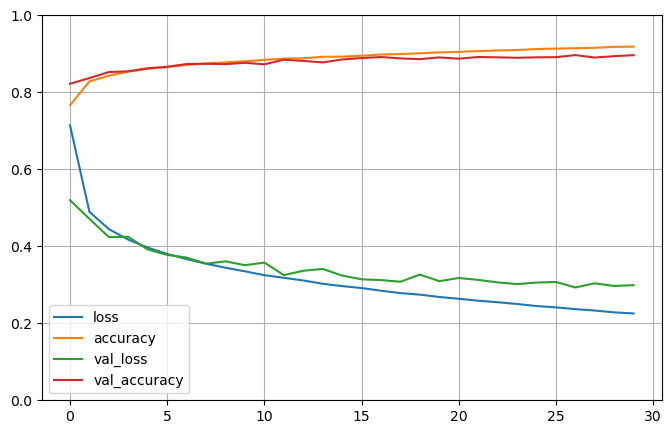

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 546us/step - loss: 0.3287 - accuracy: 0.8815


[0.32865872979164124, 0.8815000057220459]

In [19]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 60ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [24]:
y_pred = model.predict(X_new)
# y_pred

1/1 [==============================] - 0s 67ms/step


In [25]:
y_pred

array([[1.7315073e-06, 1.1602971e-06, 4.4023641e-06, 2.6837926e-05,
        9.4764155e-06, 3.5946900e-03, 6.2159115e-06, 8.2931118e-03,
        6.0079142e-04, 9.8746151e-01],
       [2.6596557e-05, 4.1804860e-08, 9.7694892e-01, 4.3413582e-08,
        2.0919695e-02, 5.2838831e-12, 2.1046875e-03, 6.8391573e-12,
        9.9301168e-08, 4.6209571e-11],
       [4.5027127e-07, 9.9999917e-01, 4.8537650e-08, 1.4515119e-07,
        1.0316326e-07, 4.3325682e-12, 1.5654388e-09, 4.5770951e-10,
        2.9334671e-10, 1.6778512e-12]], dtype=float32)

### Wide & Deep 
복잡한 패턴 + 간단한 규칙 모두 학습 가능

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)




input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs =[input_], outputs=[output])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.001))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# y_pred = model.predict()



Epoch 1/20
363/363 [==============================] - 0s 523us/step - loss: 2.1980 - val_loss: 0.8596
Epoch 2/20
363/363 [==============================] - 0s 434us/step - loss: 0.8026 - val_loss: 0.7282
Epoch 3/20
363/363 [==============================] - 0s 389us/step - loss: 0.7221 - val_loss: 0.6783
Epoch 4/20
363/363 [==============================] - 0s 379us/step - loss: 0.6781 - val_loss: 0.6409
Epoch 5/20
363/363 [==============================] - 0s 572us/step - loss: 0.6442 - val_loss: 0.6126
Epoch 6/20
363/363 [==============================] - 0s 672us/step - loss: 0.6173 - val_loss: 0.5888
Epoch 7/20
363/363 [==============================] - 0s 399us/step - loss: 0.5952 - val_loss: 0.5713
Epoch 8/20
363/363 [==============================] - 0s 394us/step - loss: 0.5772 - val_loss: 0.5542
Epoch 9/20
363/363 [==============================] - 0s 377us/step - loss: 0.5633 - val_loss: 0.5419
Epoch 10/20
363/363 [==============================] - 0s 382us/step - loss: 0.550

In [45]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 25ms/step


array([[2.0305796],
       [2.0849693],
       [3.5142972]], dtype=float32)

In [28]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 258us/step - loss: 0.4821


In [31]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)

])
model.compile(loss="mse", optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20,
                    validation_data = (X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 0s 447us/step - loss: 0.7309 - val_loss: 0.6609
Epoch 2/20
363/363 [==============================] - 0s 331us/step - loss: 0.5818 - val_loss: 0.6619
Epoch 3/20
363/363 [==============================] - 0s 350us/step - loss: 0.5346 - val_loss: 0.4829
Epoch 4/20
363/363 [==============================] - 0s 385us/step - loss: 0.4659 - val_loss: 0.4482
Epoch 5/20
363/363 [==============================] - 0s 603us/step - loss: 0.4507 - val_loss: 0.4394
Epoch 6/20
363/363 [==============================] - 0s 436us/step - loss: 0.4461 - val_loss: 0.4322
Epoch 7/20
363/363 [==============================] - 0s 345us/step - loss: 0.4341 - val_loss: 0.4236
Epoch 8/20
363/363 [==============================] - 0s 331us/step - loss: 0.4274 - val_loss: 0.4144
Epoch 9/20
363/363 [==============================] - 0s 344us/step - loss: 0.4301 - val_loss: 0.4158
Epoch 10/20
363/363 [==============================] - 0s 346us/step - loss: 0.425

In [44]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs = [input_A, input_B], outputs = [output])

In [50]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]

X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

# history = model.fit((X_train_A, X_train_B), y_train, epochs=20, 
#                     validation_data = ((X_valid_A, X_valid_B), y_valid))
# mse_test = model.evaluate((X_test_A, X_test_B), y_test)
# y_pred = model.predict((X_new_A, X_new_B))


In [51]:
output = keras.layers.Dense(1, name = "main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs = [input_A, input_B], outputs=[output, aux_output])

In [52]:
model.compile(loss = ["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")


In [54]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs = 20, 
    validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid])
)

Epoch 1/20
363/363 [==============================] - 0s 621us/step - loss: 1.1539 - main_output_loss: 1.0539 - aux_output_loss: 2.0539 - val_loss: 0.6375 - val_main_output_loss: 0.5752 - val_aux_output_loss: 1.1984
Epoch 2/20
363/363 [==============================] - 0s 433us/step - loss: 0.6170 - main_output_loss: 0.5597 - aux_output_loss: 1.1325 - val_loss: 0.5472 - val_main_output_loss: 0.4964 - val_aux_output_loss: 1.0051
Epoch 3/20
363/363 [==============================] - 0s 426us/step - loss: 0.5400 - main_output_loss: 0.4946 - aux_output_loss: 0.9487 - val_loss: 0.4977 - val_main_output_loss: 0.4594 - val_aux_output_loss: 0.8424
Epoch 4/20
363/363 [==============================] - 0s 424us/step - loss: 0.4964 - main_output_loss: 0.4609 - aux_output_loss: 0.8159 - val_loss: 0.4680 - val_main_output_loss: 0.4391 - val_aux_output_loss: 0.7284
Epoch 5/20
363/363 [==============================] - 0s 425us/step - loss: 0.4779 - main_output_loss: 0.4503 - aux_output_loss: 0.7260 

In [55]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)

162/162 [==============================] - 0s 573us/step - loss: 0.3654 - main_output_loss: 0.3514 - aux_output_loss: 0.4910


In [56]:
total_loss


0.3653589189052582

In [58]:
main_loss

0.35139837861061096

In [59]:
aux_loss

0.4910029470920563

In [61]:
y_pred, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 129ms/step


In [62]:
print(y_pred, y_pred_aux)


[[1.9389366]
 [1.1959481]
 [1.6609033]] [[2.5295243]
 [1.0981283]
 [2.0300467]]


NameError: name 'y_pred_aux' is not defined